<a href="https://colab.research.google.com/github/monteroanibal/curso_IGAC_I_2023/blob/main/curso_IGAC_I_2023_Nuquii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alistamiento del entorno

Estas librerías permiten explorar los archivos en el entorno de Colab.

In [6]:
import glob
import os

Para importar shapefiles como GeoDataFrames. *Leafmap* para descargar datos de OpenStreetMap.

In [4]:
%%capture
!pip install leafmap
!pip install geopandas osmnx

In [5]:
import geopandas as gpd
import leafmap

Para poner de fondo el contexto de OpenStreetMap.

In [6]:
%%capture 
!pip install contextily

In [7]:
import contextily as ctx

Paras utilizar los colores en el mapa cloroplético.

In [8]:
import matplotlib.colors as colors

# Se importan los datos

Se descargan los shapefiles que están publicados en un Github y se descomprimen en la sesión actual.

In [1]:
%%capture
!wget https://github.com/monteroanibal/curso_IGAC_I_2023/raw/main/curso_IGAC_I_2023_shps_Nuquii.zip
!unzip /content/curso_IGAC_I_2023_shps_Nuquii.zip
!rm /content/curso_IGAC_I_2023_shps_Nuquii.zip
!rm -rf /content/__MACOSX

Para este ejemplo, cada shapefile representa una capa de información sobre el municipio de Nuquí. Se organizan las direcciones en orden alfabético.

In [7]:
ubicacion_shps = glob.glob(os.path.join("/content/curso_IGAC_I_2023_shps_Nuquii/","*.shp"))
ubicacion_shps = sorted(ubicacion_shps)
ubicacion_shps

['/content/curso_IGAC_I_2023_shps_Nuquii/Amb_Humedal.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/Amb_Paramos.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/centro_pob_cabeceras.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/coberturas_2010_2012.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/comunidades_negras_tituladas.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/nuqui_mpal.shp',
 '/content/curso_IGAC_I_2023_shps_Nuquii/resguardos_indigenas_legalizado.shp']

Cada shapefile consta de una tabla, donde cada fila representa un elemento en el espacio y cada columna representa un atributo de ese elemento. Se importan los shapefiles de interés, tomando como referencia la numeración de las direcciones desplegadas anteriormente. La numeración o indexación en Python arranca desde cero (0). Normalente se utiliza en encoding utf-8 para referir a que se están utilizando caracteres propios del idimoa español (letras con acentos).

In [ ]:
nuqui_hume = gpd.read_file( ubicacion_shps[0], encoding='utf-8' ) # Humedales
nuqui_lulc = gpd.read_file( ubicacion_shps[3], encoding='utf-8' ) # Coberturas del suelo
nuqui_area = gpd.read_file( ubicacion_shps[5], encoding='utf-8' ) # Geometriia del municipio de Nuquii

La siguiente sentencia permite chequear el tipo de objeto al que apunta un nombre asignado.

In [ ]:
type(nuqui_lulc)

geopandas.geodataframe.GeoDataFrame

# Chequeo de la importación

Una primera aproximación a la revisión de si es ha importado una capa de información de forma correcta es dibujándola mediante el método *plot()* aplicado directamente al objeto GeoDataFrame.

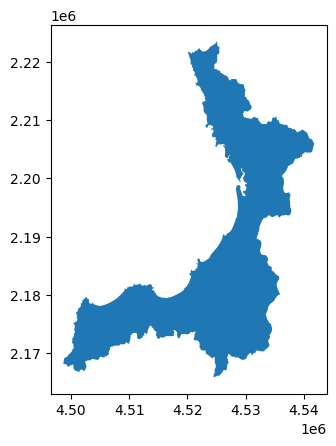

In [ ]:
ax = nuqui_area.plot()

El siguiente comando despliega el metadato del sistema de coordenadas de referencia sobre el que están proyectados los objetos del shapefile.

In [ ]:
nuqui_area.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Se reproyecta la capa al sistema de coordenadas con código 3857 con el fin de poder utilizar los mapas de fondo de OpenStreetMap.

In [ ]:
nuqui_hume = nuqui_hume.to_crs(epsg=3857)
nuqui_lulc = nuqui_lulc.to_crs(epsg=3857)
nuqui_area = nuqui_area.to_crs(epsg=3857)

Se chequea de nuevo el nuevo sistema de coordenadas sobre el que se reproyectaron las capas de información.

In [ ]:
nuqui_area.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

A continuación, se muestra la demarcación espacial del municipio de Nuquí y con ayuda del mapa de fondo. 

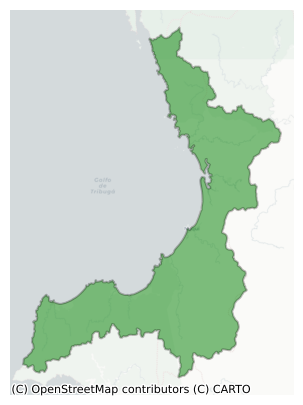

In [ ]:
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_area.plot(ax=ax, color='#008000', alpha=0.5)
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Al llamar el nombre de los GeoDataFrames sobre los que se importaron las capas de información, Colab despliega los primeros y últimos registros de las capas de información que sea llamada.

In [ ]:
nuqui_hume

,Nivel_Hume,Area_Ha,Fecha_Ingr,Fecha_Reco,NOMAH,NOMZH,NOMSZH,Grado_Tran,geometry
0,2,727.503672,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"POLYGON ((-8605258.980 664590.975, -8605258.92..."
1,2,1.590278,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"MULTIPOLYGON (((-8604027.708 661085.072, -8604..."
2,1,0.000721,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601697.467 655698.379, -8601..."
3,1,0.092073,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601376.298 655497.838, -8601..."
4,1,0.132748,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601678.268 655772.275, -8601..."
...,...,...,...,...,...,...,...,...,...
443,2,0.802682,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Sin informacion e,"MULTIPOLYGON (((-8614435.802 626600.030, -8614..."
444,1,1.626985,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8611854.981 625137.153, -8611..."
445,1,129.231906,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8604679.686 632619.207, -8604..."
446,1,0.000977,2020-08-28,NaN,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8602224.933 636138.423, -8602..."


La capa *nuqui_area* contiene solo un polígono que delimita el respectivo municipio.

In [ ]:
nuqui_area

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,Shape_Leng,Shape_Area,geometry
0,1768,27495,Nuquí,704.583366,NaN,1,5,“No es apropiada su aplicación para la ubicaci...,Chocó,270334.189583,7.045834e+08,"POLYGON ((-8603781.515 669641.052, -8603774.53..."


A continuación, se muestra la demarcación espacial de los humedales con ayuda del mapa de fondo. 

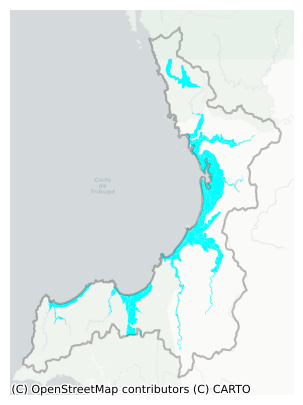

In [ ]:
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_hume.plot(ax=ax, color='#00FFFF', alpha=1)
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Exploración de datos

La siguiente sentencia permite revisar el tipo de dato que almacena cada columna o atributo de la tabla de datos de los shapefiles importados.


In [ ]:
nuqui_hume.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Nivel_Hume  448 non-null    int64   
 1   Area_Ha     448 non-null    float64 
 2   Fecha_Ingr  448 non-null    object  
 3   Fecha_Reco  0 non-null      float64 
 4   NOMAH       448 non-null    object  
 5   NOMZH       448 non-null    object  
 6   NOMSZH      448 non-null    object  
 7   Grado_Tran  448 non-null    object  
 8   geometry    448 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 31.6+ KB


Teniendo en cuenta que la capa *nuqui_hume* tiene un campo/columna/atributo/variable en el que se tiene precalculada el área de cada humedal, se puede aplicar a esta columna el método *describe()* para que despliegue estadísticas univariadas de esta variable.

In [ ]:
nuqui_hume.Area_Ha.describe().round(3)

count     448.000
mean       22.781
std        83.780
min         0.000
25%         0.002
50%         0.530
75%         4.838
max      1098.710
Name: Area_Ha, dtype: float64

*GeoPandas* permite calcular las áreas de cada polígono de la capa de información y la entrega en metros cuadrados, pero este cálculo depende del sistema de coordenadas de referencia sobre el que esté proyectada la capa. Obsérvese la diferencia entre la información de la tabla y lo calculado por Geopandas, sobre el tamaño promedio de los humedales en Nuquí.

POR QUÉ OCURRE ESTA DIFERENCIA? O ANTE LA DUDA MEJOR NO MENCIONARLO JEJE (PROYECCIÓN)

In [ ]:
( nuqui_hume.Area_Ha.describe()[1]*10000 ).round(3)

227812.247

In [ ]:
nuqui_hume.area.mean().round(3)

222498.009

La capa de humedales refiere a un grado de transición de estos ecosistemas. Dado que esta variable es categórica, se pueden contar el número de humedales por cada grado de transición por medio del método *value_counts()*.

In [ ]:
nuqui_hume.Grado_Tran.value_counts()

-                    291
Transformado          91
Natural               57
Sin informacion e      9
Name: Grado_Tran, dtype: int64

Dado que existen valores en la columna 'Grado_Tran' sin información, se remplazan todos estos valores sin información bajo una misma etiqueta y con la ayuda de el método *loc()*.

In [ ]:
nuqui_hume.loc[nuqui_hume['Grado_Tran'] == '-', 'Grado_Tran'] = 'Sin info.'
nuqui_hume.loc[nuqui_hume['Grado_Tran'] == 'Sin informacion e', 'Grado_Tran'] = 'Sin info.'

Se verifica el cambio.

In [ ]:
nuqui_hume.Grado_Tran.value_counts()

Sin info.       300
Transformado     91
Natural          57
Name: Grado_Tran, dtype: int64

Se asigna un color a cada etiqueta al declarar un objero tipo diccionario y se despliega nuevamente el mapa cloroplético de humedales por niveles de transformación.

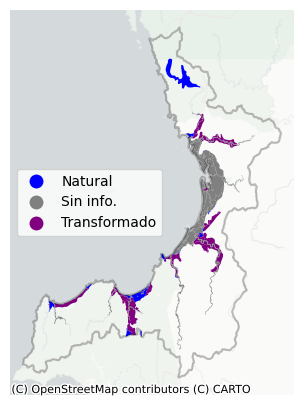

In [ ]:
color_dict = {'Natural':'blue', 'Sin info.':'grey', 'Transformado':'purple'}
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_hume.plot(ax=ax, column='Grado_Tran', cmap=colors.ListedColormap(list(color_dict.values())), legend=True, legend_kwds={'loc': 'center left'})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
nuqui_lulc.head(3)

,OBJECTID_1,OBJECTID,APOYO,CAMBIO,CONFIABILI,INSUMO,CODIGO,AREA_HA,LEYENDA3N,Shape_Leng,Shape_Le_1,Shape_Area,RULEID,geometry
0,86468,86527,NaN,1,Si,Landsat 1056 2010/08/24,411,25.085846,4.1.1. Zonas Pantanosas,0.022433,0.022433,0.000020,44,"POLYGON ((-8599862.902 635168.486, -8599848.89..."
1,86472,86531,NaN,4,Si,Landsat 1056 2010/08/24,521,3.706121,5.2.1. Lagunas costeras,0.020881,0.020881,0.000003,54,"MULTIPOLYGON (((-8602305.780 636302.250, -8602..."
2,86473,86532,NaN,1,Si,Landsat 1056 2010/08/24,423,16.593968,4.2.3. Sedimentos expuestos en bajamar,0.031021,0.031021,0.000014,49,"POLYGON ((-8599690.559 645682.467, -8599690.56..."


HOMOLOGAR PALETA DE COLOR, TOCA HACER EL CAMBIO :)

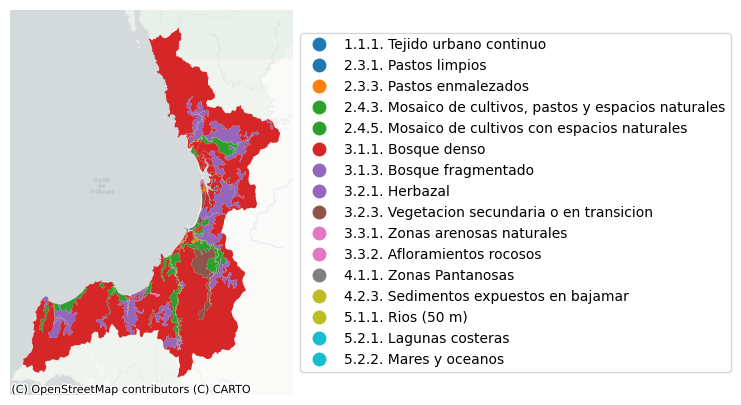

In [ ]:
ax = nuqui_lulc.plot(figsize=(5,5), column='LEYENDA3N', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum().round(3)

LEYENDA3N
1.1.1. Tejido urbano continuo                                   19.754
2.3.1. Pastos limpios                                            7.600
2.3.3. Pastos enmalezados                                      141.599
2.4.3. Mosaico de cultivos, pastos y espacios naturales       2899.302
2.4.5. Mosaico de cultivos con espacios naturales             1724.887
3.1.1. Bosque denso                                        1608639.490
3.1.3. Bosque fragmentado                                    10813.752
3.2.1. Herbazal                                                156.655
3.2.3. Vegetacion secundaria o en transicion                  2271.439
3.3.1. Zonas arenosas naturales                                 37.193
3.3.2. Afloramientos rocosos                                    45.407
4.1.1. Zonas Pantanosas                                         25.086
4.2.3. Sedimentos expuestos en bajamar                          16.594
5.1.1. Rios (50 m)                                             611.

In [ ]:
( nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum() / nuqui_lulc.AREA_HA.sum() ).round(3)

LEYENDA3N
1.1.1. Tejido urbano continuo                              0.000
2.3.1. Pastos limpios                                      0.000
2.3.3. Pastos enmalezados                                  0.000
2.4.3. Mosaico de cultivos, pastos y espacios naturales    0.002
2.4.5. Mosaico de cultivos con espacios naturales          0.001
3.1.1. Bosque denso                                        0.988
3.1.3. Bosque fragmentado                                  0.007
3.2.1. Herbazal                                            0.000
3.2.3. Vegetacion secundaria o en transicion               0.001
3.3.1. Zonas arenosas naturales                            0.000
3.3.2. Afloramientos rocosos                               0.000
4.1.1. Zonas Pantanosas                                    0.000
4.2.3. Sedimentos expuestos en bajamar                     0.000
5.1.1. Rios (50 m)                                         0.000
5.2.1. Lagunas costeras                                    0.000
5.2.2. Mares y 

<Axes: ylabel='LEYENDA3N'>

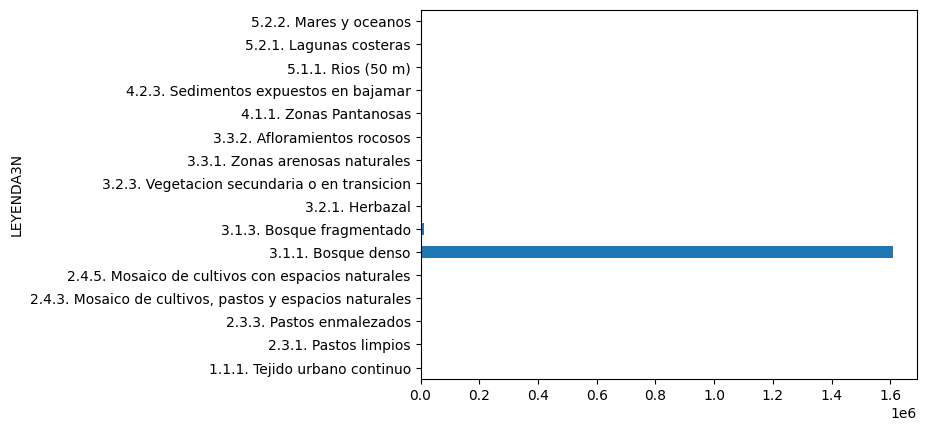

In [ ]:
nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum().plot.barh()

# Cruce de datos espaciales

In [ ]:
type( nuqui_area.to_crs(epsg=4326).geometry[0] )

shapely.geometry.polygon.Polygon

In [ ]:
m = leafmap.Map(toolbar_control=False, layers_control=True)
m.add_osm_from_polygon(nuqui_area.to_crs(epsg=4326).geometry[0], tags = {'building': True} )
m

RuntimeError: ignored

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
nuqui_osmb = leafmap.osm_gdf_from_polygon(nuqui_area.to_crs(epsg=4326).geometry[0], tags = {'building': True} )
nuqui_osmb.info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 437 entries, ('way', 546918776) to ('way', 1145160789)
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   nodes            437 non-null    object  
 1   building         437 non-null    object  
 2   geometry         437 non-null    geometry
 3   name             23 non-null     object  
 4   amenity          10 non-null     object  
 5   religion         2 non-null      object  
 6   aeroway          1 non-null      object  
 7   tourism          7 non-null      object  
 8   addr:postcode    1 non-null      object  
 9   addr:street      1 non-null      object  
 10  government       2 non-null      object  
 11  office           2 non-null      object  
 12  denomination     1 non-null      object  
 13  internet_access  1 non-null      object  
 14  shop             2 non-null      object  
 15  craft            1 non-null      object  
 16  inf

In [ ]:
nuqui_osmb = nuqui_osmb.loc[nuqui_osmb['name'].notnull(), ['name','geometry']]
nuqui_osmb

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                         
way          570183748                        Biblioteca   
             570183750                           Iglesia   
             675282449               Estación de policía   
             675282451                          Nuquimar   
             675282453                        Arena Azul   
             675282493   Centro administrativo municipal   
             675282494                    Puerta del Sol   
             675282495                Biblioteca pública   
             675282496                   Pacífico Travel   
             677086207                Punto vive digital   
             677086208                           Marimar   
             677086209                            Tienda   
             677086210                       Delfín Real   
             677086211                              Pola   
             677086212                    IPS Comfachocó   
             677086216       Juzgado promiscuo municipal   
             677086220                        Farmacosta   
             677086221  Notaria única del circuito Nuquí   
             723774701                   Bar playa terco   
             854798117                Tienda y Panadería   
             998259928               Cabanas Playa Terco   
             998260433               Cabanas Playa Terco   
             998260434               Cabanas Playa Terco   

                                                                 geometry  
element_type osmid                                                         
way          570183748  POLYGON ((-77.47488 5.59567, -77.47472 5.59564...  
             570183750  POLYGON ((-77.47467 5.59562, -77.47472 5.59544...  
             675282449  POLYGON ((-77.27103 5.70702, -77.27109 5.70715...  
             675282451  POLYGON ((-77.26421 5.71270, -77.26414 5.71279...  
             675282453  POLYGON ((-77.26356 5.71282, -77.26365 5.71288...  
             675282493  POLYGON ((-77.26741 5.70875, -77.26754 5.70890...  
             675282494  POLYGON ((-77.26579 5.71046, -77.26597 5.71065...  
             675282495  POLYGON ((-77.26737 5.70846, -77.26745 5.70834...  
             675282496  POLYGON ((-77.26608 5.70754, -77.26626 5.70765...  
             677086207  POLYGON ((-77.27023 5.70749, -77.27026 5.70756...  
             677086208  POLYGON ((-77.26720 5.70749, -77.26729 5.70767...  
             677086209  POLYGON ((-77.26677 5.70803, -77.26686 5.70818...  
             677086210  POLYGON ((-77.26609 5.70968, -77.26617 5.70976...  
             677086211  POLYGON ((-77.26620 5.70958, -77.26626 5.70963...  
             677086212  POLYGON ((-77.26727 5.70911, -77.26721 5.70916...  
             677086216  POLYGON ((-77.26741 5.70875, -77.26734 5.70865...  
             677086220  POLYGON ((-77.26647 5.70812, -77.26655 5.70817...  
             677086221  POLYGON ((-77.26621 5.70813, -77.26633 5.70821...  
             723774701  POLYGON ((-77.42885 5.61918, -77.42876 5.61910...  
             854798117  POLYGON ((-77.47451 5.59602, -77.47445 5.59615...  
             998259928  POLYGON ((-77.42872 5.61888, -77.42867 5.61893...  
             998260433  POLYGON ((-77.42867 5.61884, -77.42862 5.61889...  
             998260434  POLYGON ((-77.42863 5.61880, -77.42858 5.61885...

In [ ]:
centroides = nuqui_osmb.to_crs(epsg=9377)['geometry'].centroid
centroides

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


element_type  osmid    
way           570183748    POINT (4504122.947 2178197.297)
              570183750    POINT (4504140.517 2178185.457)
              675282449    POINT (4526843.549 2190382.591)
              675282451    POINT (4527608.463 2190996.296)
              675282453    POINT (4527673.232 2191020.430)
              675282493    POINT (4527248.777 2190579.863)
              675282494    POINT (4527418.129 2190763.702)
              675282495    POINT (4527232.124 2190528.923)
              675282496    POINT (4527382.131 2190438.844)
              677086207    POINT (4526933.702 2190430.050)
              677086208    POINT (4527262.252 2190431.682)
              677086209    POINT (4527311.819 2190489.163)
              677086210    POINT (4527390.265 2190672.457)
              677086211    POINT (4527376.510 2190657.092)
              677086212    POINT (4527287.038 2190606.969)
              677086216    POINT (4527254.702 2190561.807)
              677086220    POINT

In [ ]:
nuqui_osmb = gpd.GeoDataFrame({'nom_edif':nuqui_osmb.name, 'geometry':centroides}, crs='EPSG:9377').to_crs(epsg=3857)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nuqui_lulc.crs

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
nuqui_osmb = nuqui_osmb.sjoin(nuqui_lulc[['LEYENDA3N','geometry']], how="inner", predicate='intersects')

PUEDE SER QUE ALGUNOS EDIFICIONS CAEN EN CULTIVOS POR LA ESCALA DE LA CAPA DE COBERTURAS.

In [ ]:
nuqui_osmb

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nom_edif  \
element_type osmid                                         
way          570183748                        Biblioteca   
             570183750                           Iglesia   
             675282449               Estación de policía   
             675282493   Centro administrativo municipal   
             675282495                Biblioteca pública   
             677086207                Punto vive digital   
             677086208                           Marimar   
             677086209                            Tienda   
             677086210                       Delfín Real   
             677086211                              Pola   
             677086212                    IPS Comfachocó   
             677086216       Juzgado promiscuo municipal   
             677086220                        Farmacosta   
             677086221  Notaria única del circuito Nuquí   
             675282451                          Nuquimar   
             675282453                        Arena Azul   
             675282494                    Puerta del Sol   
             675282496                   Pacífico Travel   

                                               geometry  index_right  \
element_type osmid                                                     
way          570183748  POINT (-8624456.303 623894.516)           53   
             570183750  POINT (-8624438.599 623882.702)           53   
             675282449  POINT (-8601766.160 636367.062)            5   
             675282493  POINT (-8601361.207 636569.273)            5   
             675282495  POINT (-8601377.530 636517.718)            5   
             677086207  POINT (-8601676.095 636415.655)            5   
             677086208  POINT (-8601346.589 636419.764)            5   
             677086209  POINT (-8601297.304 636478.171)            5   
             677086210  POINT (-8601219.991 636663.820)            5   
             677086211  POINT (-8601233.672 636648.204)            5   
             677086212  POINT (-8601323.035 636596.927)            5   
             677086216  POINT (-8601355.130 636551.087)            5   
             677086220  POINT (-8601263.751 636488.999)            5   
             677086221  POINT (-8601238.786 636488.142)            5   
             675282451  POINT (-8601003.558 636992.419)           36   
             675282453  POINT (-8600938.777 637017.271)           36   
             675282494  POINT (-8601192.724 636756.154)           36   
             675282496  POINT (-8601226.411 636427.894)           36   

                                                                LEYENDA3N  
element_type osmid                                                         
way          570183748  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             570183750  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282449                      1.1.1. Tejido urbano continuo  
             675282493                      1.1.1. Tejido urbano continuo  
             675282495                      1.1.1. Tejido urbano continuo  
             677086207                      1.1.1. Tejido urbano continuo  
             677086208                      1.1.1. Tejido urbano continuo  
             677086209                      1.1.1. Tejido urbano continuo  
             677086210                      1.1.1. Tejido urbano continuo  
             677086211                      1.1.1. Tejido urbano continuo  
             677086212                      1.1.1. Tejido urbano continuo  
             677086216                      1.1.1. Tejido urbano continuo  
             677086220                      1.1.1. Tejido urbano continuo  
             677086221                      1.1.1. Tejido urbano continuo  
             675282451  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282453  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282494  2.4.3. Mosaico

In [ ]:
nuqui_osmb.LEYENDA3N.value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.1.1. Tejido urbano continuo                              12
2.4.3. Mosaico de cultivos, pastos y espacios naturales     6
Name: LEYENDA3N, dtype: int64

---

# Se exportan los datos

In [ ]:
nuqui_osmb.to_file(dir_raiz + "/resultado/edif_lulc_Nuqui.shp")
nuqui_osmb.to_excel(dir_raiz + "/resultado/edif_lulc_Nuqui.xlsx")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-d877b06fc44c>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nuqui_osmb.to_file(dir_raiz + "/resultado/edif_lulc_Nuqui.shp")
